# DATA PREPROCESSING

# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing The Dataset

In [2]:
data = pd.read_excel("Crude Oil Prices Daily.xlsx")
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


# Handling Missing Values

In [3]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [4]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [5]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [6]:
data_oil = data.reset_index()["Closing Value"]
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

# Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ( feature_range = (0,1) )
data_oil = scaler.fit_transform(np.array(data_oil).reshape(-1,1))

# Data Visualization

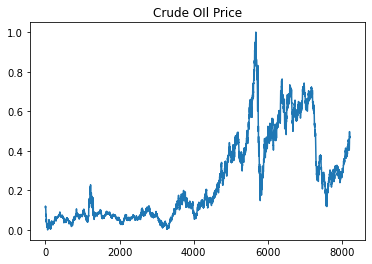

In [8]:
plt.title('Crude OIl Price')
plt.plot(data_oil)

# Splitting Data Into Train and Test

In [9]:
training_size = int(len(data_oil)*0.65)
test_size = len(data_oil)-training_size
train_data, test_data = data_oil[0:training_size,:], data_oil[training_size:len(data_oil),:1]

In [10]:
training_size, test_size

(5340, 2876)

In [11]:
train_data.shape

(5340, 1)

# Creating A Dataset With Sliding Windows

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [16]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [17]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)